<html>
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	<h2>グラフの使い方</h2>
	<p>
		Sageでのグラフの使い方について、説明します。
		<a href="http://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html">レファレンスマニュアル</a>
		を参考にしながら見てください。
	</p>
</html>

<html>
	<h3>３次元多項式をもう一度</h3>
	<a href="http://www.pwv.co.jp:8000/home/pub/26/">Sageを使ってみよう</a>
	でプロットした３次元多項式について、plot関数の使い方も含めて詳しくみてみましょう。

	<p>
		plotの呼び出しは、以下の形式で覚えると便利です。
<pre>
plot(関数, [変数名, 最小, 最大], オプション)
</pre>
		オプションは、省略可能です。plotのオプションは、plot.optionsで知ることができます。
		それ以外にもGraphicsのオプションも使えます。よく使うオプションを以下にしめします。
	
		<ul>
         <li>グラフサイズの指定figsize</li>
			<li>描画範囲指定のxmin, xmax, ymin, ymax</li>
			<li>グラフの比率を指定するaspect_ratio</li>
			<li>線の色指定のcolor</li>
		</ul>		
	</p>

	<p>
		３次元多項式の場合には、最初にプロットで使用する変数xをvar関数で定義します。
		次に関数fを定義します。今回はplotの結果をf_pltに代入していますので、最後に
		show関数でf_pltを表示します。
	</p>
	<p>
		f_plt変数に代入することによって、後で他のグラフと重ね合わせて表示することが
		できます。
	</p>
</html>

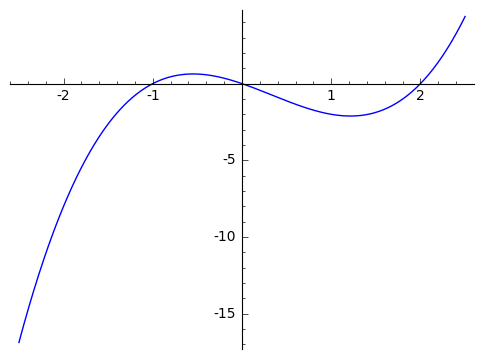

In [1]:
x = var('x')
f = x^3 - x^2 - 2*x
f_plt = plot(f, [x, -2.5, 2.5])
show(f_plt, figsize=5) 

<html>
	<p>
		plot.optionsを知るには、plot?でヘルプを表示したり、plot_optionsを表示するとよいでしょう。
	</p>
</html>

In [2]:
# plotのオプションを知る
plot.options 

{'adaptive_recursion': 5,
 'adaptive_tolerance': 0.01,
 'alpha': 1,
 'aspect_ratio': 'automatic',
 'detect_poles': False,
 'exclude': None,
 'fill': False,
 'fillalpha': 0.5,
 'fillcolor': 'automatic',
 'legend_label': None,
 'plot_points': 200,
 'rgbcolor': (0, 0, 1),
 'thickness': 1}

<html>
	<h3>接線を求める</h3>
	<p>
		点$(x_0, y_0)$での接線の傾きは、関数fの微分の$x_0$での値から得ることができますので、
		接線の式は、以下のように求めることができます。
$$
		(y - y_0) = f'(x_0) (x - x_0)
$$		
		$y_0$の値は、$f(x_0)$ですから、接線の式は以下のようになります。
$$
		y = f'(x_0) (x - x_0) + f(x_0)
$$
	</p>
	
	<p>
		この計算をSageを使って計算してみましょう。まずSageの変数x0を定義し、y0にf(x=x0)の値を代入します。
		f1にfの微分をセットします。
	</p>	
</html>

In [3]:
# (x0, y0)での接線を求める
x0 = var('x0')
y0 = f(x=x0)
f1 = diff(f, x)
show(f1)

3*x^2 - 2*x - 2

<html>
	<p>
		材料がそろったので、接線の式を定義し表示します。確認のために$x_0 = 0$での式も表示します。
	</p>
	<p>
		$x_0 = 0$での接線は、原点を通り傾き-2と求まりました。
	</p>
</html>

In [4]:
# x0 = 0での接線の式
y = f1(x=x0)*(x - x0) + y0
show(y)
show(y(x0 = 0))

x0^3 + (3*x0^2 - 2*x0 - 2)*(x - x0) - x0^2 - 2*x0

-2*x

<html>
	<p>
		この直線をプロットしてみましょう。
		x0=0での接線の式なので、plotの引数にはyではなく、y(x0=0)が渡されていることに注意してください。
	</p>
	<p>
		重ね合わせたときに区別できるように線の色を緑にします。線の色は、rgbcolorオプションで指定します。
	</p>
</html>

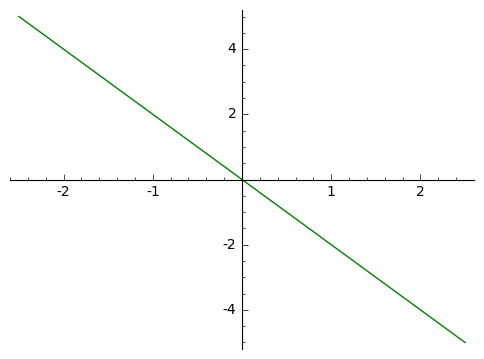

In [5]:
y_plt = plot(y(x0=0), [x, -2.5, 2.5], rgbcolor='green')
show(y_plt, figsize=5)

<html>
	<p>
		接線を計算したポイントを示すために、point関数を使って点を表示します。
	</p>
	<p>
		point関数の使い方は、以下の通りです。座標は、リストまたはタプル形式で与えます。
<pre>
point(座標, オプション属性（pointsize, rgccolor, faceted等）)
</pre>
	</p>
</html>

In [6]:
# x = 0のポイントをセット
pt = (0, f(x=0))
pt_plt = point(pt, rgbcolor='red', pointsize=30)

<html>
	<h3>グラフの重ね合わせ</h3>
	<p>
		Sageのグラフ表示機能の最大の特徴は、重ね合わせです。
		これまで計算した以下の結果を同時に表示してみましょう。
		<ul>
			<li>f_plt: ３次元多項式（青）</li>
			<li>y_plt: 接線（緑）</li>
			<li>pt_plt: 接点（赤）</li>
		</ul>		
	</p>
	<p>
		重ね合わせは至って簡単で上記の３つの変数を足し合わせて、showメソッドで表示するだけです。
	</p>
</html>

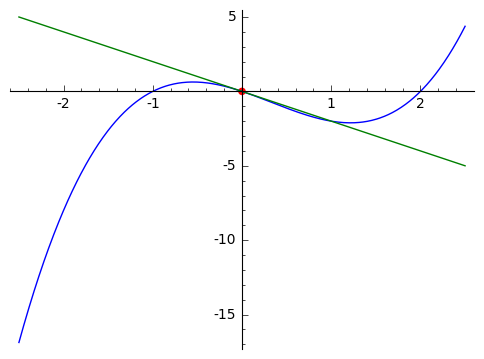

In [7]:
(f_plt + y_plt + pt_plt).show(figsize=5)

<html>
	<h3>アニメーション</h3>
	<p>
		グラフの変化を分かりやすく表示する方法として、アニメーション機能も提供しています。
	</p>
	<p>
		アニメーションでは、グラフのリストを作成し、それをanimate関数に渡し、描画範囲を
		xmin, xmax, ymin, ymaxで指定するだけで簡単にアニメーションが作成できます。
		作成されたアニメーションの表示もshowメソッドを使います。
	</p>
</html>

In [9]:
g_list = [_MyGraph(x1) for x1 in srange(-2.5,2.5,0.2)]
a = animate(g_list, xmin=-2.5, xmax=2.5, ymin=-20, ymax=10)
a.show(figsize=5)

Animation with 25 frames

In [17]:
a.save?

<html>
	<h3>ユーザ指定（インタラクティブ）</h3>
	<p>
		Sageのノートブックでのもう一つの特徴にユーザが逐次値を指定することができる、
		インタラクティブ機能があります。
	</p>
	<p>
		接点の座標x0をユーザ任意に指定できるように、_MyGraph関数を定義して、
		与えられたx1でのグラフの重ね合わせを返すようにします。
	</p>
</html>

In [8]:
# 与えられたx座標でのfと接線のグラフを返す関数を定義
def _MyGraph(x1):
    y_plt = plot(y(x0=x1), [x, -2.5, 2.5], rgbcolor='green')
    pt = (x1, f(x=x1))    # x0, y0の座標をセット
    pt_plt = point(pt, rgbcolor='red', pointsize=30)
    return (f_plt + y_plt + pt_plt) # f_pltは先の結果を再利用

<html>
	<p>
		インタラクティブ機能を使う場合、
<pre>
@interact	
</pre>		
		の後に関数を定義します。ここでは、_（アンダーバー）という特殊な関数名を指定します。
	</p>
	<p>
		関数の引数で与えられた変数をユーザが入力することができるようになります。
		ここでは、slider関数を使って-2.5から2.5の範囲で1/10の刻みのスライダー
		バーを表示してx1を指定できるようにします。
	</p>
	<p>
		関数の内容は、_MyGraph関数でx1で指定された座標の接線とポイントの重ね合わせ
		グラフを返し、showメソッドでグラフを表示します。グラフ表示範囲がx1の値でかわらない
		ようにymin, ymaxで範囲を指定します。
	</p>
</html>

In [15]:
# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON
# ユーティリティ
load('script/sage_util.py')

In [12]:
@interact
def _(x1 = (-3, 3)):
    graph = _MyGraph(x1)
    _to_png(graph)

<html><!--notruncate-->
        <div padding=6 id="div-interact-0">
          <table width=800px height=20px bgcolor="#c5c5c5" cellpadding=15>
            <tr>
              <td bgcolor="#f9f9f9" valign=top align=left>
            <table>
              <tr><td colspan=3><table><tr><td align=right><font color="black">x1&nbsp;</font></td><td>
        <table>
          <tr>
            <td>
              <div id="slider-x1-0" style="margin:0px; margin-left: 1.0em; margin-right: 1.0em; width: 15.0em;"></div>
            </td>
            
            <td>
              <font color="black" id="slider-x1-0-lbl"></font>
            </td>
          </tr>
        </table><script>
    (function() {
        var values = ["-3.0","-2.987975951903808","-2.9759519038076157","-2.9639278557114235","-2.9519038076152313","-2.939879759519039","-2.927855711422847","-2.9158316633266548","-2.9038076152304626","-2.8917835671342704","-2.8797595190380783","-2.867735470941886","-2.855711422845694","-2.8436873747

In [14]:
%%HTML
<html><!--notruncate-->
        <div padding=6 id="div-interact-0">
          <table width=800px height=20px bgcolor="#c5c5c5" cellpadding=15>
            <tr>
              <td bgcolor="#f9f9f9" valign=top align=left>
            <table>
              <tr><td colspan=3><table><tr><td align=right><font color="black">x1&nbsp;</font></td><td>
        <table>
          <tr>
            <td>
              <div id="slider-x1-0" style="margin:0px; margin-left: 1.0em; margin-right: 1.0em; width: 15.0em;"></div>
            </td>
            
            <td>
              <font color="black" id="slider-x1-0-lbl"></font>
            </td>
          </tr>
        </table><script>
    (function() {
        var values = ["-3.0","-2.987975951903808","-2.9759519038076157","-2.9639278557114235","-2.9519038076152313","-2.939879759519039","-2.927855711422847","-2.9158316633266548","-2.9038076152304626","-2.8917835671342704","-2.8797595190380783","-2.867735470941886","-2.855711422845694","-2.8436873747495017","-2.8316633266533096","-2.8196392785571174","-2.807615230460925","-2.795591182364733","-2.783567134268541","-2.7715430861723487","-2.7595190380761565","-2.7474949899799643","-2.735470941883772","-2.72344689378758","-2.711422845691388","-2.6993987975951956","-2.6873747494990035","-2.6753507014028113","-2.663326653306619","-2.651302605210427","-2.6392785571142348","-2.6272545090180426","-2.6152304609218504","-2.6032064128256582","-2.591182364729466","-2.579158316633274","-2.5671342685370817","-2.5551102204408895","-2.5430861723446974","-2.531062124248505","-2.519038076152313","-2.507014028056121","-2.4949899799599287","-2.4829659318637365","-2.4709418837675443","-2.458917835671352","-2.44689378757516","-2.434869739478968","-2.4228456913827756","-2.4108216432865834","-2.3987975951903913","-2.386773547094199","-2.374749498998007","-2.3627254509018147","-2.3507014028056226","-2.3386773547094304","-2.326653306613238","-2.314629258517046","-2.302605210420854","-2.2905811623246617","-2.2785571142284695","-2.2665330661322773","-2.254509018036085","-2.242484969939893","-2.230460921843701","-2.2184368737475086","-2.2064128256513165","-2.1943887775551243","-2.182364729458932","-2.17034068136274","-2.1583166332665478","-2.1462925851703556","-2.1342685370741634","-2.1222444889779712","-2.110220440881779","-2.098196392785587","-2.0861723446893947","-2.0741482965932025","-2.0621242484970104","-2.050100200400818","-2.038076152304626","-2.026052104208434","-2.0140280561122417","-2.0020040080160495","-1.989979959919857","-1.9779559118236647","-1.9659318637274723","-1.95390781563128","-1.9418837675350875","-1.9298597194388951","-1.9178356713427027","-1.9058116232465103","-1.893787575150318","-1.8817635270541255","-1.8697394789579331","-1.8577154308617407","-1.8456913827655483","-1.833667334669356","-1.8216432865731635","-1.8096192384769711","-1.7975951903807788","-1.7855711422845864","-1.773547094188394","-1.7615230460922016","-1.7494989979960092","-1.7374749498998168","-1.7254509018036244","-1.713426853707432","-1.7014028056112396","-1.6893787575150472","-1.6773547094188548","-1.6653306613226624","-1.65330661322647","-1.6412825651302776","-1.6292585170340852","-1.6172344689378928","-1.6052104208417004","-1.593186372745508","-1.5811623246493156","-1.5691382765531232","-1.5571142284569308","-1.5450901803607384","-1.533066132264546","-1.5210420841683536","-1.5090180360721612","-1.4969939879759688","-1.4849699398797764","-1.472945891783584","-1.4609218436873916","-1.4488977955911992","-1.4368737474950068","-1.4248496993988145","-1.412825651302622","-1.4008016032064297","-1.3887775551102373","-1.3767535070140449","-1.3647294589178525","-1.35270541082166","-1.3406813627254677","-1.3286573146292753","-1.3166332665330829","-1.3046092184368905","-1.292585170340698","-1.2805611222445057","-1.2685370741483133","-1.256513026052121","-1.2444889779559285","-1.232464929859736","-1.2204408817635437","-1.2084168336673513","-1.196392785571159","-1.1843687374749665","-1.1723446893787741","-1.1603206412825817","-1.1482965931863893","-1.136272545090197","-1.1242484969940045","-1.1122244488978121","-1.1002004008016197","-1.0881763527054273","-1.076152304609235","-1.0641282565130425","-1.0521042084168502","-1.0400801603206578","-1.0280561122244654","-1.016032064128273","-1.0040080160320806","-0.9919839679358882","-0.9799599198396958","-0.9679358717435034","-0.955911823647311","-0.9438877755511186","-0.9318637274549262","-0.9198396793587338","-0.9078156312625414","-0.895791583166349","-0.8837675350701566","-0.8717434869739642","-0.8597194388777718","-0.8476953907815794","-0.835671342685387","-0.8236472945891946","-0.8116232464930022","-0.7995991983968098","-0.7875751503006174","-0.775551102204425","-0.7635270541082326","-0.7515030060120402","-0.7394789579158478","-0.7274549098196554","-0.715430861723463","-0.7034068136272706","-0.6913827655310782","-0.6793587174348859","-0.6673346693386935","-0.6553106212425011","-0.6432865731463087","-0.6312625250501163","-0.6192384769539239","-0.6072144288577315","-0.5951903807615391","-0.5831663326653467","-0.5711422845691543","-0.5591182364729619","-0.5470941883767695","-0.5350701402805771","-0.5230460921843847","-0.5110220440881923","-0.4989979959919999","-0.4869739478958075","-0.4749498997996151","-0.4629258517034227","-0.4509018036072303","-0.4388777555110379","-0.4268537074148455","-0.4148296593186531","-0.4028056112224607","-0.3907815631262683","-0.37875751503007593","-0.36673346693388353","-0.35470941883769114","-0.34268537074149874","-0.33066132264530634","-0.31863727454911395","-0.30661322645292155","-0.29458917835672915","-0.28256513026053676","-0.27054108216434436","-0.25851703406815196","-0.24649298597195957","-0.23446893787576717","-0.22244488977957477","-0.21042084168338238","-0.19839679358718998","-0.18637274549099758","-0.17434869739480519","-0.1623246492986128","-0.1503006012024204","-0.138276553106228","-0.1262525050100356","-0.11422845691384322","-0.10220440881765083","-0.09018036072145845","-0.07815631262526607","-0.06613226452907368","-0.0541082164328813","-0.04208416833668892","-0.030060120240496535","-0.018036072144304152","-0.0060120240481117675","0.006012024048080617","0.018036072144273003","0.030060120240465386","0.04208416833665777","0.05410821643285015","0.06613226452904254","0.07815631262523492","0.09018036072142731","0.10220440881761969","0.11422845691381207","0.12625250501000446","0.13827655310619685","0.15030060120238925","0.16232464929858165","0.17434869739477404","0.18637274549096644","0.19839679358715884","0.21042084168335123","0.22244488977954363","0.23446893787573603","0.24649298597192842","0.2585170340681208","0.2705410821643132","0.2825651302605056","0.294589178356698","0.3066132264528904","0.3186372745490828","0.3306613226452752","0.3426853707414676","0.35470941883766","0.3667334669338524","0.3787575150300448","0.3907815631262372","0.4028056112224296","0.414829659318622","0.4268537074148144","0.4388777555110068","0.45090180360719917","0.46292585170339157","0.47494989979958396","0.48697394789577636","0.49899799599196876","0.5110220440881611","0.5230460921843535","0.5350701402805459","0.5470941883767383","0.5591182364729307","0.5711422845691231","0.5831663326653155","0.5951903807615079","0.6072144288577003","0.6192384769538927","0.6312625250500851","0.6432865731462775","0.6553106212424699","0.6673346693386623","0.6793587174348547","0.691382765531047","0.7034068136272394","0.7154308617234318","0.7274549098196242","0.7394789579158166","0.751503006012009","0.7635270541082014","0.7755511022043938","0.7875751503005862","0.7995991983967786","0.811623246492971","0.8236472945891634","0.8356713426853558","0.8476953907815482","0.8597194388777406","0.871743486973933","0.8837675350701254","0.8957915831663178","0.9078156312625102","0.9198396793587026","0.931863727454895","0.9438877755510874","0.9559118236472798","0.9679358717434722","0.9799599198396646","0.991983967935857","1.0040080160320493","1.0160320641282417","1.028056112224434","1.0400801603206264","1.0521042084168188","1.0641282565130112","1.0761523046092036","1.088176352705396","1.1002004008015884","1.1122244488977808","1.1242484969939732","1.1362725450901656","1.148296593186358","1.1603206412825504","1.1723446893787428","1.1843687374749352","1.1963927855711276","1.20841683366732","1.2204408817635124","1.2324649298597048","1.2444889779558972","1.2565130260520896","1.268537074148282","1.2805611222444744","1.2925851703406668","1.3046092184368592","1.3166332665330516","1.328657314629244","1.3406813627254364","1.3527054108216288","1.3647294589178212","1.3767535070140136","1.388777555110206","1.4008016032063983","1.4128256513025907","1.4248496993987831","1.4368737474949755","1.448897795591168","1.4609218436873603","1.4729458917835527","1.4849699398797451","1.4969939879759375","1.50901803607213","1.5210420841683223","1.5330661322645147","1.545090180360707","1.5571142284568995","1.569138276553092","1.5811623246492843","1.5931863727454767","1.605210420841669","1.6172344689378615","1.6292585170340539","1.6412825651302463","1.6533066132264387","1.665330661322631","1.6773547094188235","1.6893787575150159","1.7014028056112083","1.7134268537074007","1.725450901803593","1.7374749498997855","1.7494989979959779","1.7615230460921703","1.7735470941883626","1.785571142284555","1.7975951903807474","1.8096192384769398","1.8216432865731322","1.8336673346693246","1.845691382765517","1.8577154308617094","1.8697394789579018","1.8817635270540942","1.8937875751502866","1.905811623246479","1.9178356713426714","1.9298597194388638","1.9418837675350562","1.9539078156312486","1.965931863727441","1.9779559118236334","1.9899799599198258","2.002004008016018","2.01402805611221","2.0260521042084023","2.0380761523045945","2.0501002004007867","2.062124248496979","2.074148296593171","2.086172344689363","2.0981963927855554","2.1102204408817475","2.1222444889779397","2.134268537074132","2.146292585170324","2.1583166332665162","2.1703406813627084","2.1823647294589006","2.1943887775550928","2.206412825651285","2.218436873747477","2.2304609218436693","2.2424849699398615","2.2545090180360536","2.266533066132246","2.278557114228438","2.29058116232463","2.3026052104208223","2.3146292585170145","2.3266533066132067","2.338677354709399","2.350701402805591","2.362725450901783","2.3747494989979754","2.3867735470941676","2.3987975951903597","2.410821643286552","2.422845691382744","2.4348697394789363","2.4468937875751284","2.4589178356713206","2.470941883767513","2.482965931863705","2.494989979959897","2.5070140280560893","2.5190380761522815","2.5310621242484737","2.543086172344666","2.555110220440858","2.56713426853705","2.5791583166332424","2.5911823647294345","2.6032064128256267","2.615230460921819","2.627254509018011","2.6392785571142032","2.6513026052103954","2.6633266533065876","2.6753507014027798","2.687374749498972","2.699398797595164","2.7114228456913563","2.7234468937875485","2.7354709418837406","2.747494989979933","2.759519038076125","2.771543086172317","2.7835671342685093","2.7955911823647015","2.8076152304608937","2.819639278557086","2.831663326653278","2.84368737474947","2.8557114228456624","2.8677354709418545","2.8797595190380467","2.891783567134239","2.903807615230431","2.9158316633266232","2.9278557114228154","2.9398797595190076","2.9519038076151998","2.963927855711392","2.975951903807584","2.9879759519037763","3.0"];
        setTimeout(function() {
            $('#slider-x1-0').slider({
                step: 1,
                min: 0,
                max: 499,
                value: 0,
                change: function (e, ui) {
                    var position = ui.value;
                    if (values != null) {
                        $('#slider-x1-0-lbl').text(values[position]);
                        interact(0, {variable: 'x1', adapt_number: 3, value: encode64(position)}, 1);
                    }
                },
                slide: function (e, ui) {
                    if (values != null) {
                        $('#slider-x1-0-lbl').text(values[ui.value]);
                    }
                }
            });
            if (values != null) {
                $('#slider-x1-0-lbl').text(values[$('#slider-x1-0').slider('value')]);
            }
        }, 1);
    })();
    </script></td>
</tr></table></td></tr>
              <tr><td></td><td style='width: 100%;'>
        <div id="cell-interact-0"><?__SAGE__START>
          <table border=0 bgcolor="white" width=100%>
            <tr>
              <td bgcolor="white" align=left valign=top>
                <pre><?__SAGE__TEXT></pre>
              </td>
            </tr>
            <tr>
              <td align=left valign=top><?__SAGE__HTML></td>
            </tr>
          </table><?__SAGE__END>
        </div></td><td></td></tr>
              <tr><td colspan=3></td></tr>
            </table></td>
            </tr>
          </table>
        </div></html>

In [15]:
from ipywidgets import interact
@interact(x=(0, 10))
def square(x):
    print "The square of %d is %d." %(x , x**2)

ValueError: (0, 10) cannot be transformed to a Widget

In [ ]:
# python2.7カーネルでsageの関数を使う
%load_ext sage
# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON
# テンプレートエンジン
load('script/JinjaMagics.py')
# ユーティリティ
load('script/sage_util.py')